Add all imports needed for assignment (used the same imports from lecture 16)

In [77]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import exp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns   

Read the data file and remove any duplicates that exist

In [78]:
df = pd.read_csv('FRAFirm.csv')
df.drop_duplicates(inplace = True)

Split the dataset into input and output and apply train split(using my own values for test size and random state). 

In [92]:
y = df.Class
X = df.iloc[:, df.columns != 'Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=18, stratify=y)

Scale the data to make sure the disparity between them isn't too large

In [93]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

Use LogisticRegressions ML to check the accuracy for the scaled sets

In [94]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
train_accuracy = model.score(X_train_scaled, y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test_scaled, y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

The accuracy for the training set is 94.50%
The accuracy for the test set is 94.43%


Probability Array from data

In [95]:
probs = model.predict_proba(X_test_scaled)
np.set_printoptions(precision=5, suppress=True)
probs[:10]

array([[0.96014, 0.02983, 0.01003],
       [0.98814, 0.00694, 0.00492],
       [0.97449, 0.01724, 0.00827],
       [0.96474, 0.02474, 0.01052],
       [0.85215, 0.11482, 0.03303],
       [0.98018, 0.01242, 0.0074 ],
       [0.98486, 0.0099 , 0.00524],
       [0.993  , 0.00472, 0.00229],
       [0.96315, 0.02657, 0.01028],
       [0.90255, 0.07371, 0.02374]])

Confusion Matrix from our dataset 

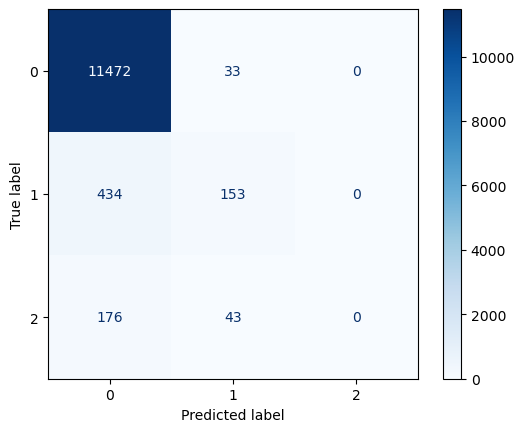

In [96]:
y_pred = model.predict(X_test_scaled)
cm=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)

Classification Report

In [98]:
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1', 'Class 2']))


Classification Report

              precision    recall  f1-score   support

     Class 0       0.95      1.00      0.97     11505
     Class 1       0.67      0.26      0.37       587
     Class 2       0.00      0.00      0.00       219

    accuracy                           0.94     12311
   macro avg       0.54      0.42      0.45     12311
weighted avg       0.92      0.94      0.93     12311



C:\Users\Noe\anaconda3\envs\BigData\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Noe\anaconda3\envs\BigData\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Noe\anaconda3\envs\BigData\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Question 1:
Since the precision and recall of accident type 2 is 0, we can state the the observation is that the machine learning cannot accurately predict when it occurs and therefore cannot tell the differnce between the two.

Question 2:
To find which features are most significant in performing classification, using a heat map will give us that information.

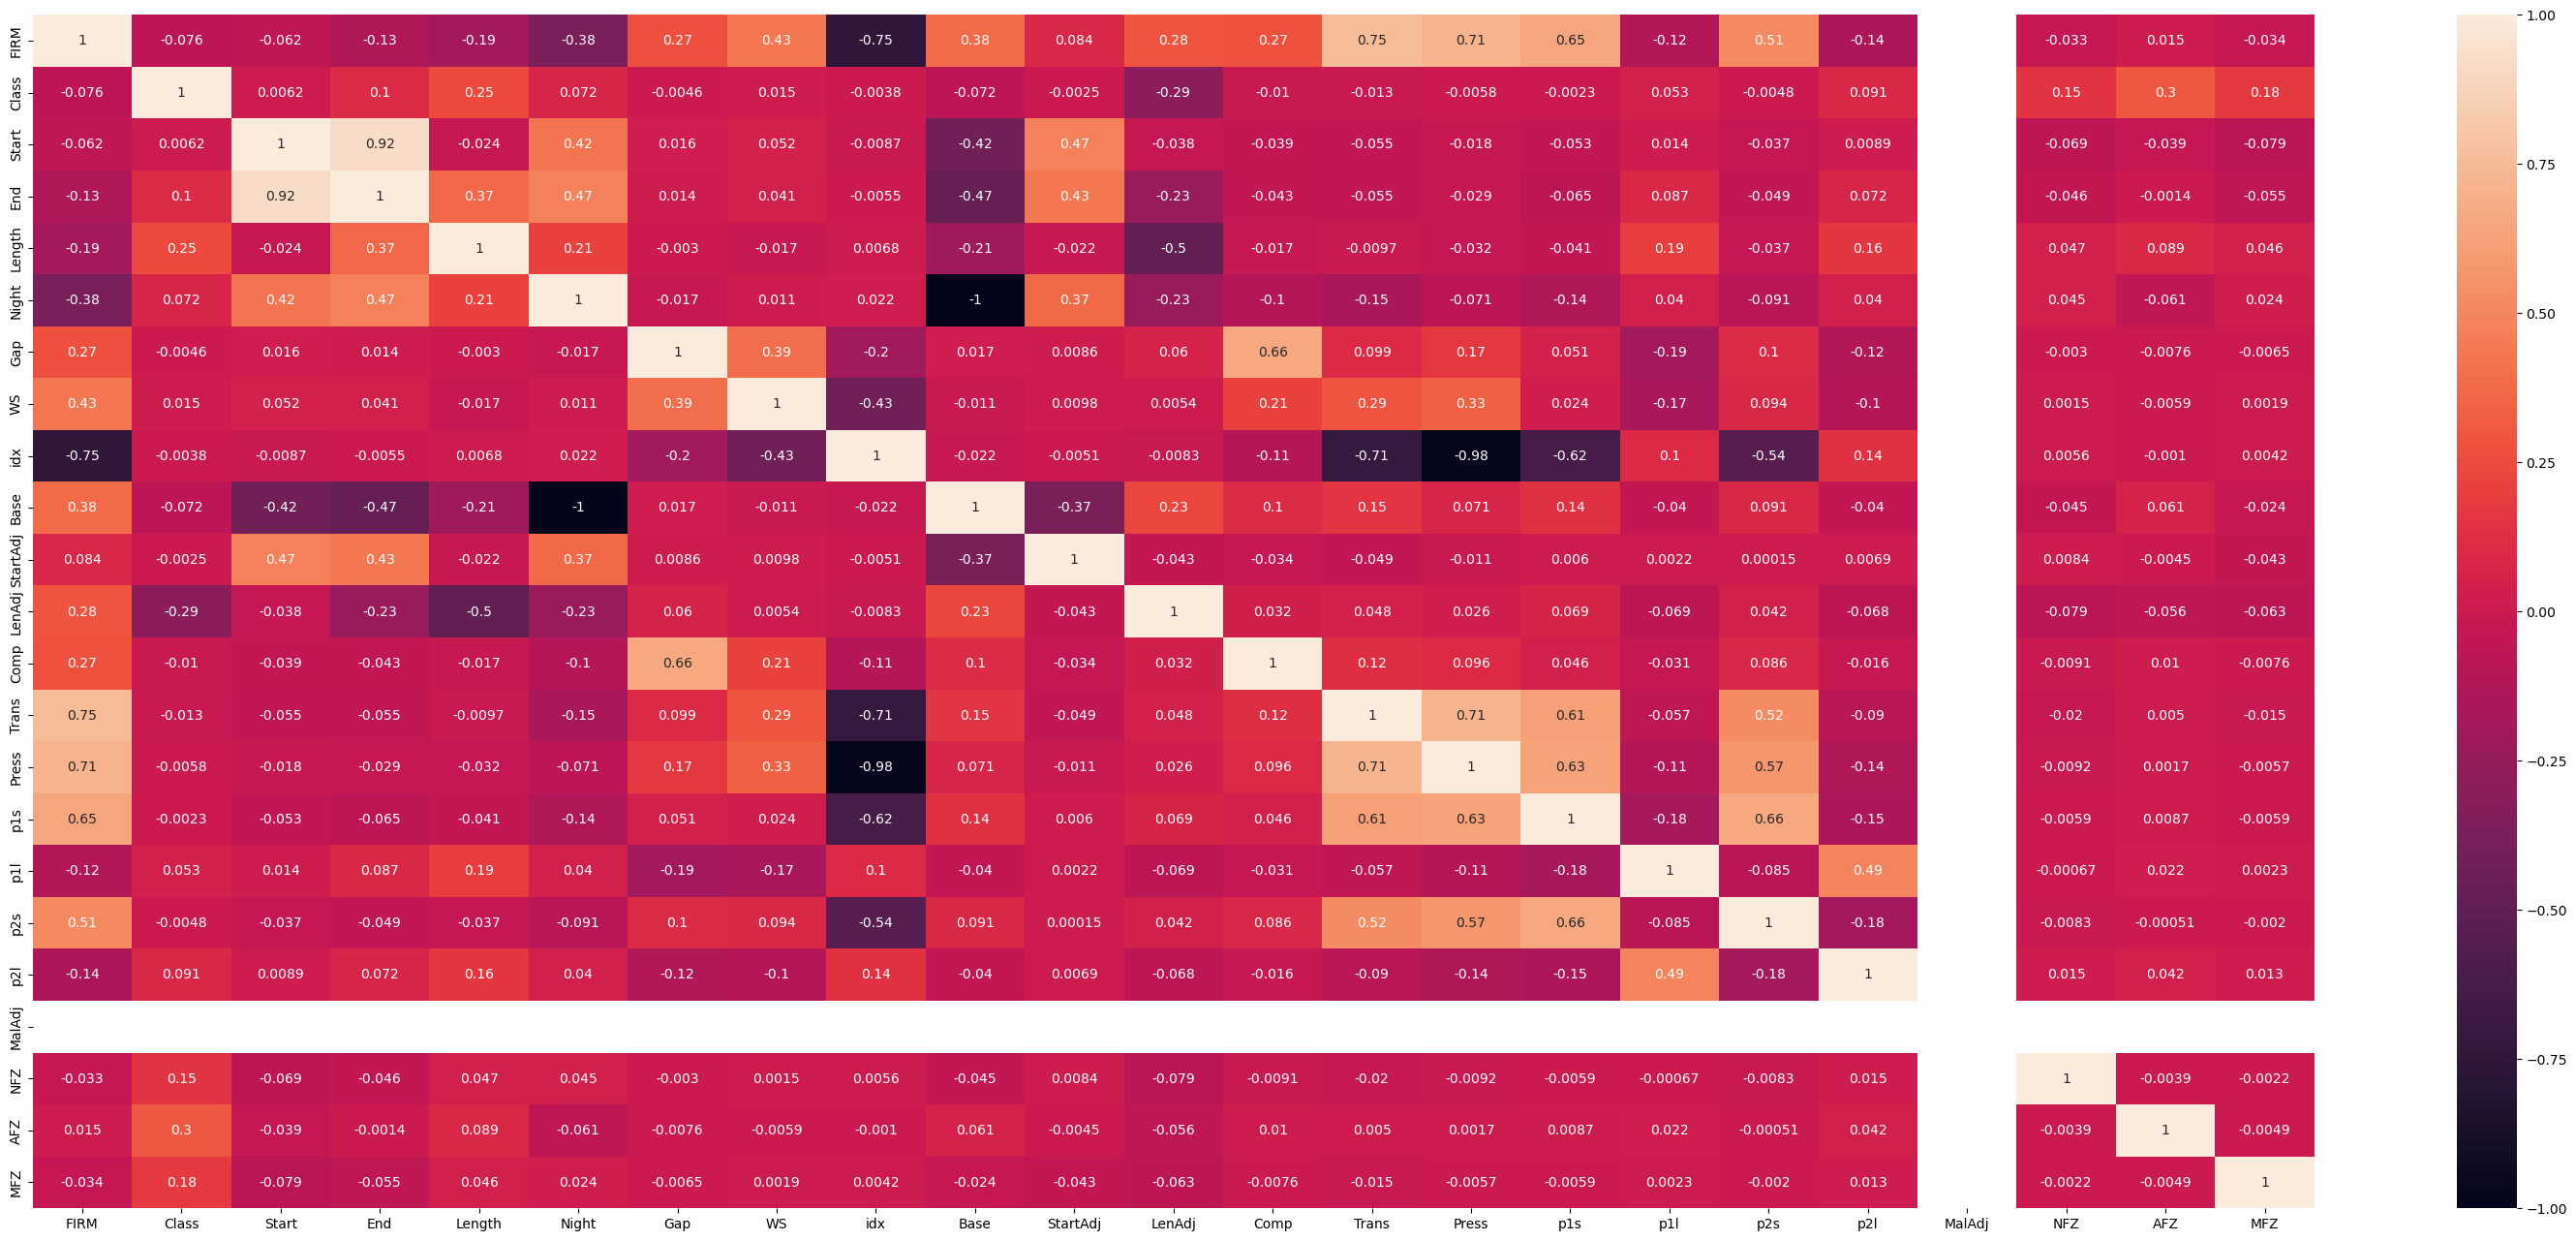

In [99]:
plt.figure(figsize = (38, 16))
sns.heatmap(df.corr(), annot = True)
plt.show()

Question 3:
largest correlation with classification for the accident: End, Length, LenAdj, NFZ, AFS and MFZ 
least significant and could be ignored: Start, Gap, idx, StartAdj, Press, pls, and p2s